I will be using Simple Linear Regression to Predict the tv marketing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("tvmarketing.csv") as f:
    file = pd.read_csv(f)
print(file)

        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


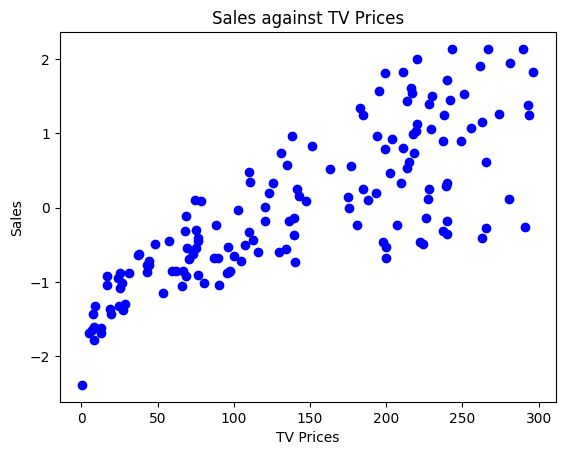

In [146]:
x_train, x_test = file["TV"][:150], file["TV"][150:]
x_train = np.array(x_train)

y_train, y_test = file["Sales"][:150], file["Sales"][150:]
y_mean, y_std = y_train.mean(), y_train.std()
y_train =  (y_train - y_mean) / y_std
y_train = np.array(y_train)

plt.scatter(x_train, y_train,marker='o',c='b')
plt.title("Sales against TV Prices")
plt.ylabel("Sales")
plt.xlabel("TV Prices")
plt.show()

In [166]:
x_in = x_train[::]

f = lambda w,x,b: w * np.log(x) + b

def compute_gradient(x,y,w,b):
    m = x.shape[0]

    dj_dw = 0.
    dj_db = 0.

    for i in range(m):
        dj_dw_i = (f(w,x[i],b) - y[i])
        dj_db += (f(w,x[i],b) - y[i])
        dj_dw += dj_dw_i * x[i]

    return dj_dw / m, dj_db / m

In [167]:
def gradient_descent(x,y,w,b,nums_iter,learning_rate):

    m = x.shape[0]

    for i in range(nums_iter):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        b -= learning_rate * dj_db
        w -= learning_rate * dj_dw

    return w,b

In [197]:
m = x_in.shape[0]
w_ = 0.
b_ = 0.
nums_iter = 10000
learning_rate = 0.0006

w,b = gradient_descent(x_in,y_train,w_,b_,nums_iter,learning_rate)

print(w,b)

0.4624875722666281 -1.9150532677285443


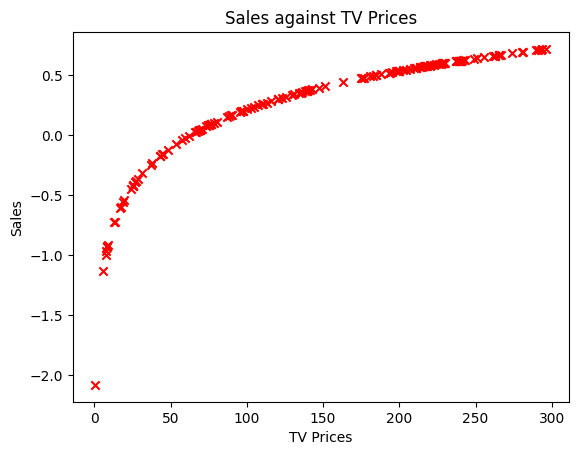

In [199]:
predictions = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    predictions[i] = f(w,x_in[i],b)

plt.scatter(x_train, y_train,marker='o',c='g')
plt.scatter(x_train, predictions,marker='x',c='r')
plt.title("Sales against TV Prices")
plt.ylabel("Sales")
plt.xlabel("TV Prices")
plt.show()